In [24]:
import pandas as pd
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

         Product Name        Date  Price
0    iPhone 15 128 GB  28.07.2024  48899
1    iPhone 15 128 GB  29.07.2024  48899
2    iPhone 15 128 GB  30.07.2024  48839
3    iPhone 15 128 GB  31.07.2024  48829
4    iPhone 15 128 GB  01.08.2024  48829
..                ...         ...    ...
263  iPhone 15 128 GB  30.04.2025  50998
264  iPhone 15 128 GB  01.05.2025  50999
265  iPhone 15 128 GB  02.05.2025  51149
266  iPhone 15 128 GB  03.05.2025  46500
267  iPhone 15 128 GB  06.05.2025  50939

[268 rows x 3 columns]


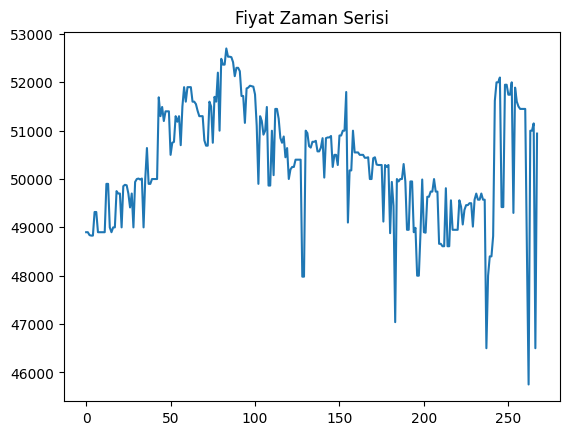

In [25]:
df = pd.read_csv(r"csv/akakce.csv")
df["Price"] = df["Price"].apply(lambda x: int(str(x).replace(" TL", "").split(",")[0].replace(".", "")))
df = df.drop_duplicates(subset=["Date"])
df = df.reset_index(drop=True)   
df['Price'].plot(title='Fiyat Zaman Serisi')
print(df)


In [26]:
model = ARIMA(df['Price'], order=(3, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  268
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2196.575
Date:                Wed, 07 May 2025   AIC                           4403.150
Time:                        20:37:17   BIC                           4421.086
Sample:                             0   HQIC                          4410.355
                                - 268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5142      0.377     -1.364      0.173      -1.253       0.225
ar.L2         -0.1545      0.056     -2.752      0.006      -0.264      -0.044
ar.L3         -0.1008      0.038     -2.620      0.0

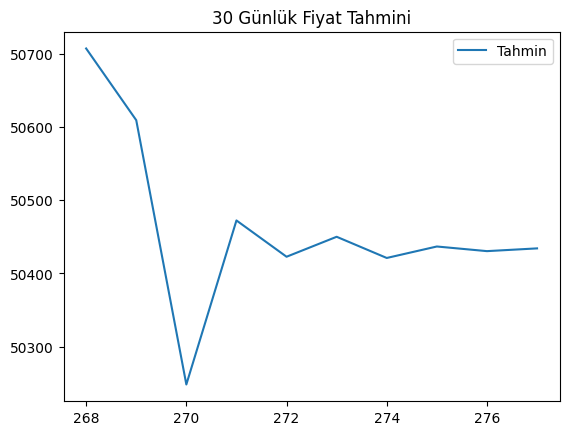

In [27]:
import matplotlib.pyplot as plt

forecast = model_fit.forecast(steps=10)
forecast.plot(label='Tahmin')
plt.legend()
plt.title("30 Günlük Fiyat Tahmini")
plt.show()


In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Price'])  # Zaman serisi burada 'fiyat'
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.47485873619167
p-value: 0.12171190690754441


In [29]:
df['price_diff'] = df['Price'].diff().dropna()
df.dropna(subset=['price_diff'], inplace=True)
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['price_diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -6.53612534642687
p-value: 9.599047467891807e-09


267    50616.238024
268    50479.681134
269    50421.905481
270    50397.461265
271    50387.119197
272    50382.743587
273    50380.892317
274    50380.109066
275    50379.777681
276    50379.637476
Name: predicted_mean, dtype: float64


C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978

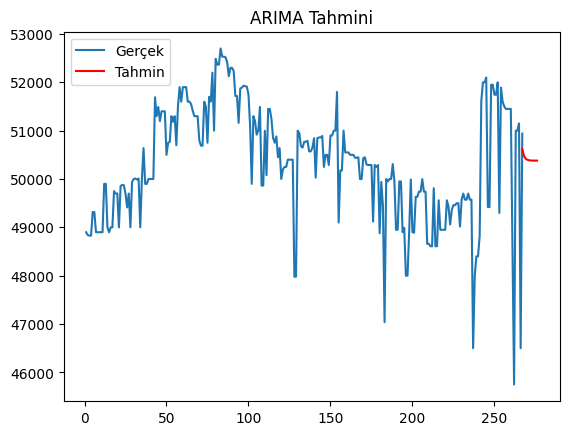

In [32]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Serin zaten varsa:
model = ARIMA(df['Price'], order=(1, 1, 1))  # Tahmini değerler
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
print(forecast)
plt.plot(df['Price'], label='Gerçek')
plt.plot(range(len(df), len(df)+10), forecast, label='Tahmin', color='red')
plt.title('ARIMA Tahmini')
plt.legend()
plt.show()
